#3$^o$ Trabalho de PSD

### Número do grupo: `10`

`André Silveira Sousa RA: 628239`

`Juan Henrique dos Santos  RA: 594946`

`Vinícius Gonçalves Arruda RA: 744355`


In [2]:
!pip install scikit-dsp-comm
import sk_dsp_comm.sigsys as ss

import numpy as np
from matplotlib import pylab
from pylab import *

import matplotlib.pyplot as plt
import scipy.signal as signal

     |████████████████████████████████| 90 kB 5.7 MB/s 


##1 Convolução


A convolução de um filtro $h_n$, $n = 0, 1, . . . , M$ de ordem $M$, e um sinal causal de duração finita $x_n$, $n = 0, 1, . . . , L − 1$ de comprimento $L$, é definida como na Equação 1:

$$
    \sum\limits_{m = max(0,n-L+1)}^{min(n,M)} h_m x_{m-n} 
$$

$n = 0, 1, ..., L+M-1$

##2 Prática

Considere um filtro semelhante a um integrador definido pela Equação 2 de Entrada/Saída:     

$$
y(n) = 0,1 * [x(n) + x(n-1) + x(n-2) + ... + x(n-14)]
$$

Esse filtro acumula (integra) as 14 amostras do sinal de entrada, ou seja, a atual e mais 13 anteriores. O fator $0,1$ representa apenas um fator de escala conveniente para este experimento. Segue-se que a resposta ao impulso deste filtro é dada por Equação 3:    

$$
  h_n = \begin{cases}
    0,1  & 0 \leq n \leq 14 \\
    0 & \text{caso contrario}
  \end{cases}
$$

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


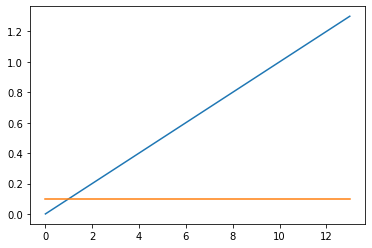

In [91]:
# implementacao do filtro e da resposta impulsiva:

n1 = np.arange(0, 14)
f1 = 0.1

filtro_integrador = f1 * n1 * ss.drect(n1, N=15)
resposta_impulsiva = f1 * ss.drect(n1, N = 15)
#obs: o drect faz com que os valores fora dos 15 (entre 0 e 14) sejam 0

print(filtro_integrador)
print(resposta_impulsiva)

plt.plot(filtro_integrador)
plt.plot(resposta_impulsiva)

##2.1 Atividades

a) Escreva uma função python3 de nome `conv1` que implementa a Equação 1. Ela deve ser usada como:    

> $y = myconv1(x,h)$

em que $x$, $h$ e $y$ são os vetores representando o sinal de entrada, o filtro e o sinal de saída respectivamente. A função deve ser capaz de aceitar como entrada os vetores $x$ e $h$, se eles forem inseridos como linhas ou colunas. Além disso, o vetor de saída $y$ deve corresponder ao mesmo tipo do vetor de entrada $x$, ou seja, linha ou coluna.

In [80]:
# implementacao da funcao conv1:

'''
OBS: ESSA FUNCAO EH A QUE IMPLEMENTAMOS NO TRABALHO 1
TEMOS QUE MUDAR ELA PRA ACEITAR ENTRADAS EM VETOR LINHA E VETOR COLUNA
(DO JEITO QUE TÁ, SÓ ACEITA VETOR LINHA)
'''

def conv1(x,h):

  # definindo o formato da resposta::
  # cria um vetor resposta y com valores zero
  # o tamanho de y é o tamanho do vetor x {{L}} + o tamanho do vetor h - 1 {{M-1}} (definição)

  len_y = len(x) + len(h)-1
  y = np.zeros(len_y)

  # preenchendo o vetor y com as somas das multiplicações para cada i (índice que percorre o vetor x) e j (índice que percorre o vetor h)

  for i in range(len(x)):
      for j in range(len(h)):
          y[i+j] += x[i] * h[j] 
          # OBS: a atribuição += vai somando com os valores que já estão em y, por isso é importante já começar com ele zerado

  return y

b) Para observar a resposta de estado estacionário do filtro descrito pela Equação 3, bem como os transientes de entrada e saída da entrada, considere um sinal de entrada dado por uma onda quadrada $x_n$ de comprimento $L = 200$ e período de $K = 50$ amostras. Na linguagem C, tal sinal pode ser obtido pelo Algoritmo 1:    



```
for( n=0; n<L; n++ ){
    if( n%K < K/2 ) x[n] = 1;
    else x[n] = 0;
}
```



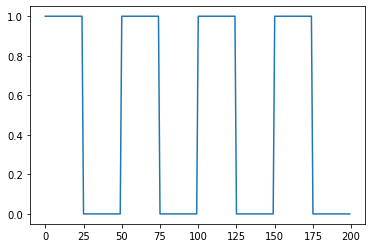

In [31]:
# implementacao do sinal de onda:

L = 200
K = 50
t = np.arange(0,200)

for j in t:
  if j%K < K/2 : onda_quadrada[j] = 1
  else : onda_quadrada[j] = 0

plt.plot(t, onda_quadrada)

c) Usando sua função `conv1`, calcule o sinal de saída $y_n$ e plote-o no mesmo gráfico com $x_n$ ($x_n$ versus $n$ e $y_n$ versus $n$). A medida que a onda quadrada liga e desliga periodicamente, **verifique e relate** os comportamentos `transiente ligado`, `estável`e `transiente desligado` do filtro.

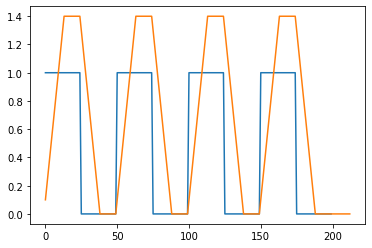

In [83]:
# implementacao do grafico sinal de entrada e saida do filtro

y1 = conv1(onda_quadrada, resposta_impulsiva)

plt.plot(onda_quadrada)
plt.plot(y1)

d) Verifique (**plote para comparação**) se sua função produz os mesmos resultados que a função do python3 `numpy.convolve`

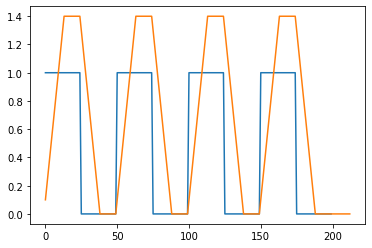

In [84]:
# implementacao do grafico sinal de entrada e saida do filtro atraves do numpy convolve

y2 = np.convolve(onda_quadrada, resposta_impulsiva)

plt.plot(onda_quadrada)
plt.plot(y2)

e) Usando a relação entre convolução no espaço e no domínio da frequência dada pela Equação 5:

$$
x_ n * h_ n = ifft[fft(x_ n) \cdot fft(h_ n)]
$$

sendo $fft$ e $ifft$ respectivamente as transformadas rápidas de Fourier direta e inversa. Implemente uma função com o nome `conv2` (com os mesmos parâmetros de entrada e saída da função `conv1`) que faça a convolução dos sinais $x_n$ e $h_n$ no domínio da frequência (lado direito da Equação 5). Observe que a função $ifft$ retorna valores complexos cuja parte imaginária não é exatamente zero, como deveria ser, devido à precisão numérica finita; nesse caso, considere apenas a parte real dos números. Na implementação da função `conv2` use *padding/cropping* caso os sinais tenham tamanhos diferentes. Não é aceitável o uso de funções prontas para a convolução, a não ser quando especificado.

In [89]:
# implementacao da funcao conv2:

'''
OBS: ESSA FUNCAO EH A QUE IMPLEMENTAMOS NO TRABALHO 2
ELA ESTA CERTA, SÓ TEMOS QUE MUDAR PRA ACEITAR ENTRADAS EM VETOR COLUNA TAMBEM
(DO JEITO QUE TÁ, SÓ ACEITA VETOR LINHA)
'''

def conv2(x,h):

  # Construindo a convolucao atraves do metodo de Cooley-Tukey

  #len_fft = calcula o tamanho do vetor para fft se baseando na potencia de 2 mais proxima da concatenação de x com h
  len_fft = int(pow(2, ceil(log2(abs(len(x) + len(h) - 1)))))

  #x_padd e h_padd são os vetores x e h concatenados com um vetor de 0 até o comprimento len_fft
  len_xfft = len_fft - len(x)
  len_hfft = len_fft - len(h)
  x_zero = np.zeros((len_xfft,) , dtype=int)
  h_zero = np.zeros((len_hfft,) , dtype=int)
  x_padd = concatenate((x, x_zero))
  h_padd = concatenate((h, h_zero))

  #utilizando o algoritmo de fft do numpy para transformar x e h para o dominio da frequencia
  x_freq = np.fft.fft(x_padd)
  h_freq = np.fft.fft(h_padd)

  #yc2 no dominio da frequencia é a multiplicação dos vetores x e y (item a item)
  yc2_freq = x_freq * h_freq

  #utilizando a transformada inversa ifft do numpy para passar yc2 para o dominio do tempo
  #obs: yc2 volta com valores complexos
  yc2 = np.fft.ifft(yc2_freq)

  return yc2.real


f) Usando agora a nova função de convolução `conv2`, repita as análises realizadas com a função `conv1` (itens c e d)

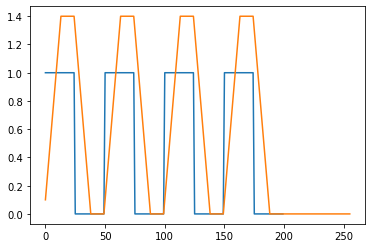

In [90]:
# convolucao da onda quadrada com o filtro a partir da funcao conv2:

y3 = conv2(onda_quadrada, resposta_impulsiva)

plt.plot(onda_quadrada)
plt.plot(y3)

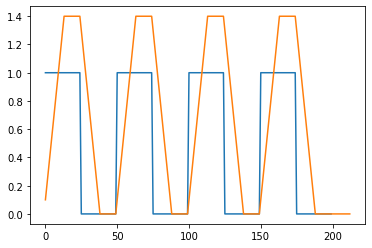

In [35]:
# convolucao da onda quadrada com o filtro a partir da funcao convolve do numpy:

y2 = np.convolve(onda_quadrada, resposta_impulsiva)

plt.plot(onda_quadrada)
plt.plot(y2)

g) Repita os itens c e d para o filtro

$$
  h_n = \begin{cases}
    0,25 \times (0,75)^n  & 0 \leq n \leq 14 \\
    0 & \text{caso contrario}
  \end{cases}
$$

que age mais como um filtro do tipo integrador-RC (resistor-capacitor) do que um acumulador. Este filtro atua como um diferenciador. Assim, em seu estado estacionário, ele diferencia uma constante para zero. Conforme a onda quadrada assume valores 0 e 1, você poderá observar a ação diferenciadora do filtro, bem como os transientes gerados.

[0.25       0.1875     0.140625   0.10546875 0.07910156 0.05932617
 0.04449463 0.03337097 0.02502823 0.01877117 0.01407838 0.01055878
 0.00791909 0.00593932]
[0.25       0.1875     0.140625   0.10546875 0.07910156 0.05932617
 0.04449463 0.03337097 0.02502823 0.01877117 0.01407838 0.01055878
 0.00791909 0.00593932 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


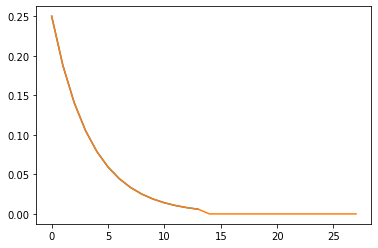

In [74]:
# implementacao do filtro:

n2 = np.arange(0, 14)
f2 = 0.25

filtro_diferenciador = f2 * pow(0.75, n2) * ss.drect(n2, N = 15)

# calculando a resposta impulsiva do filtro:

h2 = np.convolve(signal.unit_impulse(15), filtro_diferenciador)

print(filtro_diferenciador)
print(h2)

plt.plot(filtro_diferenciador)
plt.plot(h2)

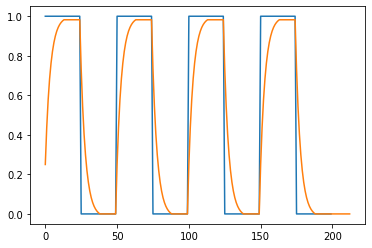

In [78]:
# fazendo a convolucao do filtro novo com o sinal de onda atraves da funcao conv1

y5 = conv1(onda_quadrada, filtro_diferenciador)
plt.plot(onda_quadrada)
plt.plot(y5)

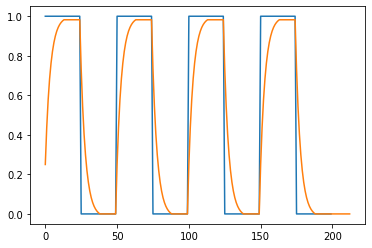

In [58]:
# fazendo a convolucao do filtro novo com o sinal de onda atraves da funcao convolve no numpy

y6 = np.convolve(onda_quadrada, filtro_diferenciador)
plt.plot(onda_quadrada)
plt.plot(y6)

h) Repita os itens c e d para o filtro cuja função de transferência é

$$
H(z) = \frac{1}{5} (1-z^{-1})^5 
$$

In [ ]:
# !!!!!!!! ITEM CANCELADO !!!!!!!!

i) Para demonstrar os conceitos de resposta ao impulso, linearidade e invariância no tempo, considere um filtro com resposta ao impulso finita $h_ n = (0,95)^n$ para $0 \leq n \leq 24$. O sinal de entrada $x(n) = \delta(n) + 2\delta(n-40) + 2\delta(n-70) + \delta(n-80)$ com $n = 0, 1, ..., 120$ consiste em quatro impulsos de intensidades indicadas ocorrendo nas instâncias de tempo indicadas. Observe que os dois primeiros impulsos são separados por uma duração maior que a duração do filtro, enquanto os dois últimos são separados por menos. Usando sua função `conv1`calcule a saída do filtro $y_n$ para $0 \leq n \leq 120$ e plote-a no mesmo gráfico com $x_n$. Comente sobre a saída resultante em relação à linearidade e invariância no tempo. Ao gerar o sinal de entrada acima, você pode achar útil a seguinte função delta escrita em C: 



```
/* delta.c - delta function */

double delta(n){
  int n;
  if (n == 0) return 1;
  else return 0;
}
```



[1.         0.95       0.9025     0.857375   0.81450625 0.77378094
 0.73509189 0.6983373  0.66342043 0.63024941 0.59873694 0.56880009
 0.54036009 0.51334208 0.48767498 0.46329123 0.44012667 0.41812034
 0.39721432 0.3773536  0.35848592 0.34056163 0.32353354 0.30735687]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


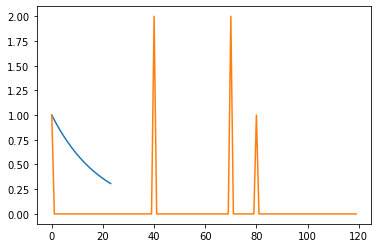

In [75]:
# implementacao do filtro e do sinal de entrada:
n3 = np.arange(0, 24)
f3 = 0.95

hn = pow(f3, n3) * ss.drect(n3, N = 25)

n = np.arange(0, 120)
xn = (ss.dimpulse(n) + 2*ss.dimpulse(n-40) + 2*ss.dimpulse(n-70) + ss.dimpulse(n-80))

print(hn)
print(xn)

plt.plot(hn)
plt.plot(xn)

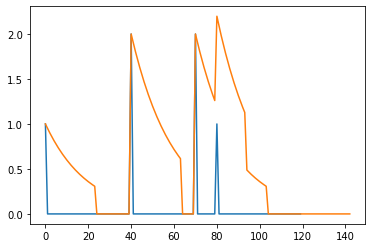

In [79]:
# fazendo a convolucao do sinal de entrada com o filtro atraves da funcao conv1

yn = conv1(xn, hn)
plt.plot(xn)
plt.plot(yn)

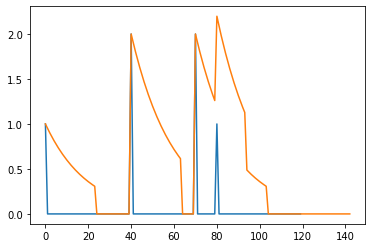

In [67]:
# fazendo a convolucao do sinal de entrada com o filtro atraves da funcao convolve do numpy

yn2 = np.convolve(xn, hn)
plt.plot(xn)
plt.plot(yn2)